# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C://DataScience/Спринт5/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

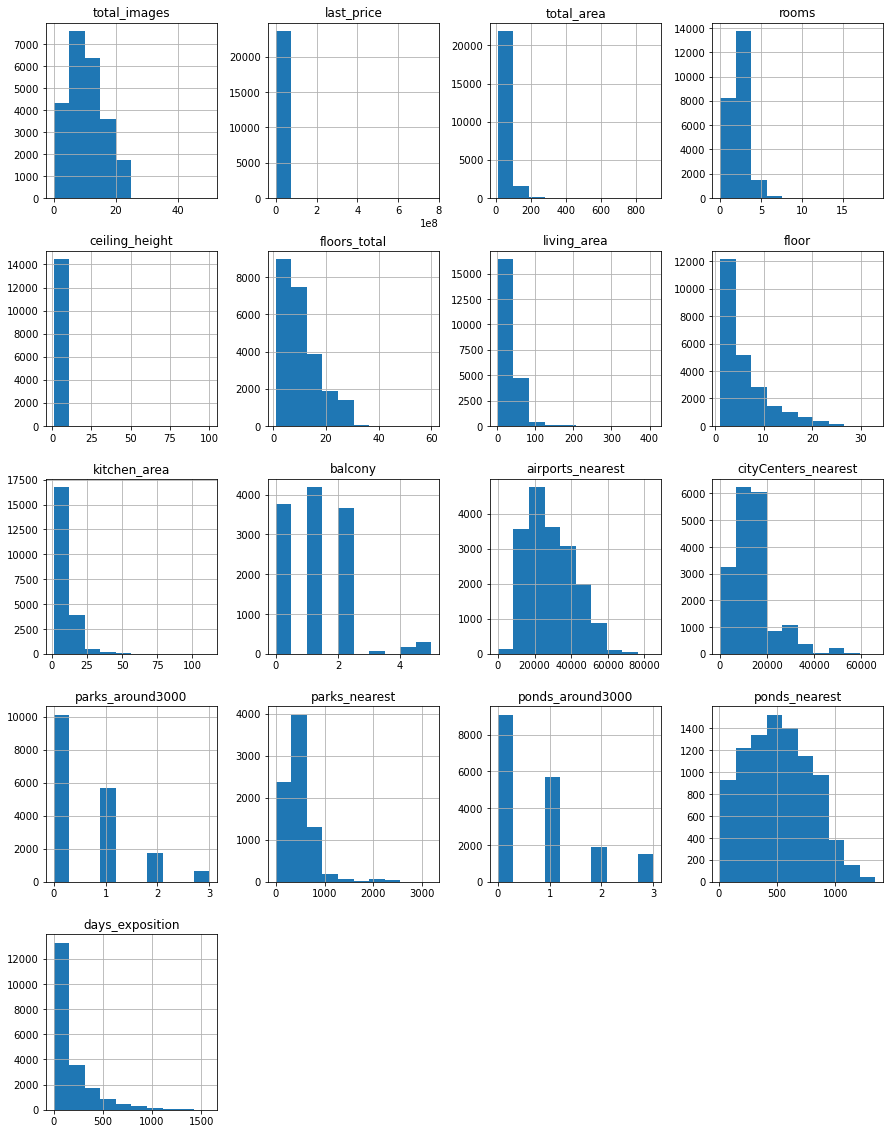

In [5]:
data.hist(figsize=(15,20))

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

Выясним сколько пропусков есть в каждом столбце

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пойдем по порядку и рассмотрим каждый столбец

Рассмотрим столбец "ceiling_height". Посмотрим, какие значения присутствуют в данном столбце.

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Убедились, что пропуск состоят только из значений nan

Так как попусков данного столба довольно много и этот параметр является важным, то заменим пропуски медианой. Используем значение медианы, так как в данных очевидно есть выбросы, например, высота потолков 100 метров или 1 метр.

In [9]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [10]:
data['ceiling_height'].isnull().sum()

0

Рассмотрим floors_total

In [11]:
data['floors_total'].value_counts(dropna=False)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [12]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

Пропусков оказалось не очень много. Эти пропуски, скорее всего, возникли либо из-за человеческого фактора, либо из-за технического. Возможно, данные при переносе были утеряны или, так как эти данные добавлялись пользователями, то просто были не внесены. Так как количество пропусков в этом столбце невелико и сложно сделать логическую замену, то удалим их.

<AxesSubplot:>

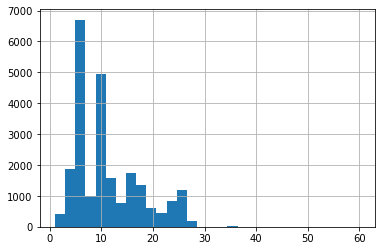

In [13]:
data['floors_total'].hist(bins=30)

Рассмотрим living_area

In [14]:
data['living_area'].max()

409.7

<AxesSubplot:>

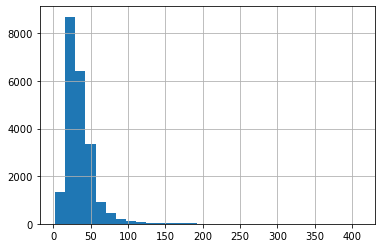

In [15]:
data['living_area'].hist(bins=30)

In [16]:
data.loc[(~data['living_area'].isna())&(data['studio'])][['living_area', 'total_area', 'balcony', 'kitchen_area', 'studio', 'is_apartment']]


,living_area,total_area,balcony,kitchen_area,studio,is_apartment
144,15.50,27.00,2.0,NaN,True,NaN
438,24.75,27.11,2.0,NaN,True,NaN
693,17.50,24.10,NaN,NaN,True,NaN
712,12.00,17.00,0.0,NaN,True,NaN
1169,17.00,29.00,2.0,NaN,True,NaN
...,...,...,...,...,...,...
22748,16.80,28.00,NaN,NaN,True,NaN
22783,18.20,30.00,NaN,NaN,True,NaN
22793,18.00,28.00,NaN,NaN,True,NaN
23126,18.00,26.00,0.0,NaN,True,NaN


Рассматривая наличие или отсутствие данных разных столбцов было первое предположение, что жилая площаь и общая площадь будут одинаковыми в случае, когда квартира является студией, но исходя из полученных выше данных видно, что это не так. Так же, так как у нас отсутствуют данные о площадь других помещений: ванная, туалет и т.д., то нельзя воспользоваться разницой между общей площадью и площадью всего "нежилого" пространтсва. Так как жилая площадь является важным параметром, то попытаемся найти среднее значение отношения жилой площади к общей и заменим эти пропуски коэффициентом от общей площади.

In [17]:

data['living_area'].fillna(
    (data['total_area']*(data.query('living_area.notna()')['living_area'] / data.query('living_area.notna()')['total_area']).mean()),
    inplace=True)


Рассмотрим столбец "is_apartment"

Можно предположить, что отсутвие значения в столбце "is_apartment", свидетельствует о том, что квартира не является апартаментом. Сделаем требуемую замену.

In [18]:
data['is_apartment'].value_counts(dropna=False)

NaN      20838
False     2725
True        50
Name: is_apartment, dtype: int64

In [19]:
data['is_apartment'].fillna(False, inplace=True)

In [20]:
data['is_apartment'].value_counts(dropna=False)

False    23563
True        50
Name: is_apartment, dtype: int64

Рассмотрим столбец kitchen_area. Посмотрим сколько квартир, которые являются студией имеют размерность кухни.

In [21]:
data.loc[~(data['kitchen_area'].isna())&(data['studio']==True)]['studio'].count()

0

Данное значение верно, так как понятия студии подразумевает под собой объединенное пространтсво, поэтому размерности кухни должны отсутствовать. Заменим все пропуски в столбце kitchen_area квартиры, которая является студией на 0.

In [22]:
data.loc[(data['kitchen_area'].isna())&(data['studio']==True), 'kitchen_area'] = 0

In [23]:
data['kitchen_area'].isna().sum()

2085

Мы избавились от небольшого количества пропусков. Далее также как были проведены рассчеты жилой площади, найдем среднее значение доли кухни от значения общая площадь - жилая (берем разницу, потому что как раз получится площадь ванны, туалета, кухни и т.д. вместе вязтых) 

In [24]:
rest_area =  (data['kitchen_area']/ (data['total_area'] - data['living_area'])).mean()
data['kitchen_area'].fillna(
    ((data['total_area'] - data['living_area'])*rest_area),
    inplace=True)

Рассмотрим столбец balcony

Отсутвие данных о наличии балкона говорит об их отсутвии, значит заполним пропуски значением 0.

In [25]:
data['balcony'] = data['balcony'].fillna(0)

In [26]:
data['balcony'].value_counts()

0.0    15193
1.0     4195
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Пропуски данных о населенном пункте логически никак не заменить, оставим их.

Значение стобца расстояния до ближайшего аэропорта оставим без изменений, потому что нельзя подобрать логическую замену.

<AxesSubplot:>

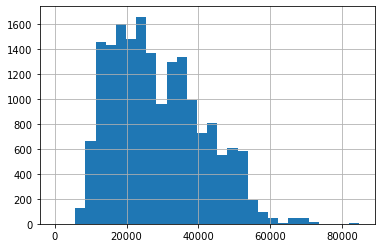

In [27]:
data['airports_nearest'].hist(bins=30)

In [28]:
data['parks_around3000'].value_counts(dropna=False)

0.0    10064
1.0     5657
NaN     5508
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

In [29]:
data[['parks_around3000', 'parks_nearest']]

,parks_around3000,parks_nearest
0,1.0,482.0
1,0.0,NaN
2,1.0,90.0
3,2.0,84.0
4,2.0,112.0
...,...,...
23608,1.0,796.0
23609,NaN,NaN
23610,NaN,NaN
23611,2.0,173.0


In [30]:
data.loc[data['parks_around3000'].isna()]['parks_nearest'].unique()

array([nan])

Так как столбец parks_around3000 несет инфорацию о количестве парков в радиусе 3000км, то все пропуски можно заменить на 0. В свою же очередь parks_nearest пишет расстояние до ближайшего парка. По распредению видно, что в данных отсутвуют значения больше 3000 км, а значит в данные не вносится значения, если парк сильно отдален от квартиры. Оставим столбец parks_nearest без изменений, так как отсутсвие значения несет смысл, что парк находится сильно далеко. 

In [31]:
data['parks_around3000'].fillna(0, inplace=True)

Аналогично с ponds_around3000 и ponds_nearest

In [32]:
data['ponds_around3000'].fillna(0, inplace=True)

Рассмотрим значения столбца days_exposition

In [33]:
data['days_exposition'].mean()

180.88483929357665

In [34]:
data['days_exposition'].median()

95.0

In [35]:
data.loc[data['days_exposition'].isna()][['first_day_exposition', 'last_price','days_exposition']]

,first_day_exposition,last_price,days_exposition
0,2019-03-07T00:00:00,13000000.0,NaN
7,2019-04-18T00:00:00,7915000.0,NaN
44,2018-11-18T00:00:00,5350000.0,NaN
45,2018-12-02T00:00:00,5200000.0,NaN
46,2019-01-31T00:00:00,6600000.0,NaN
...,...,...,...
23598,2018-11-02T00:00:00,21400000.0,NaN
23599,2019-01-24T00:00:00,2490000.0,NaN
23608,2017-03-21T00:00:00,9700000.0,NaN
23610,2018-02-11T00:00:00,2500000.0,NaN


По таблице выше нельзя построить никаких логических связей со значениями столбца days_exposition, поэтому оставим его без изменений. 

Проверим сколько пропусков мы исправили

In [36]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Рассмотрим, какие типы данных есть в таблице

In [37]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Заменим тип данных столбца first_day_exposition на datetime

In [38]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

floors_total не может содержать значение с точкой, заменим на int

In [39]:
data['floors_total'] = data['floors_total'].astype('int')

Число балконов должно быть типом int

In [40]:
data['balcony'] = data['balcony'].astype('int')

Аналогично с parks_around3000 и ponds_around3000

In [41]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')


Предположительно в ячейках столба days_exposition есть ошибочные данные - те, которые имееют дробную часть, тогда округлим эти значения в большую сторону и изменим тип столбца на int

In [42]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
1116.0      1
1325.0      1
1345.0      1
1232.0      1
971.0       1
Name: days_exposition, Length: 1139, dtype: int64

In [43]:
data['days_exposition'] = pd.to_numeric(data['days_exposition'], downcast='integer')

In [44]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
1116.0      1
1325.0      1
1345.0      1
1232.0      1
971.0       1
Name: days_exposition, Length: 1139, dtype: int64

Убедимся, что все типы данных успешно изменились.

In [45]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

Изучим есть ли дубликаты в данных. Так как у нас есть только один столбец с названиями, то рассмотрим только его ('locality_name')

In [46]:
unique_locality = data.loc[data['locality_name'].notna()]['locality_name'].unique()
print(unique_locality, len(unique_locality))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [47]:
for elem in ['поселок ', "посёлок ", 'деревня ', "городского типа ", "городского типа ", "садовое товарищество ", "село ", 'городской ', 'коттеджный ', "при железнодорожной станции ", "садоводческое некоммерческое товарищество ", "станции "]:
    data['locality_name'] = data['locality_name'].str.replace(elem,'', regex=True)

In [48]:
unique_locality = data.loc[data['locality_name'].notna()]['locality_name'].unique()
print(unique_locality, len(unique_locality))

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

Так как количество уникальных значений уменьшилось и они перестали повторяться, то можно считать, дубликаты, вызванные названием населенных пунктов, были убраны.

In [49]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,11.000000,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.826726,9,False,...,29.524724,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Изучим выбросы

Зададим функцию, которая будет выводит долю выбросов.

In [54]:
def proportion(column):
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    IQR = q3 - q1
    print('Доля: ', data.loc[data[column] >= q3 + 1.5*IQR][column].count() / data[column].count())

<AxesSubplot:>

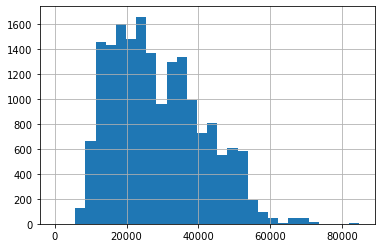

In [55]:
data['airports_nearest'].hist(bins=30)

In [56]:
data['airports_nearest'].describe()

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

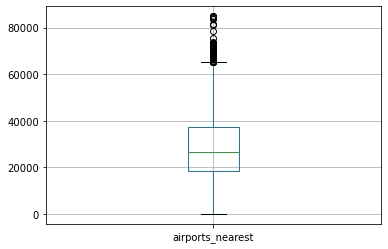

In [57]:
data.boxplot(column=['airports_nearest'])

Посмотрим сколько значений, которые считаются выбросами

In [58]:
proportion('airports_nearest')

Доля:  0.005807200929152149


Так как значений выбросов не очень много и, вероятно, есть квартиры, удаленные от аэропрта на 84 км, то оставим их.

In [59]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [60]:
data.loc[data['ceiling_height'] < 2.1]['ceiling_height'].count()

14

Так как минимальной нормой в России считается высота потолка 2,1 метра,а значение таких квартир очень невелико - удалим их.

In [61]:
data = data.loc[data['ceiling_height'] >= 2.1]

In [62]:
q3 = data['ceiling_height'].quantile(0.75)
q1 = data['ceiling_height'].quantile(0.25)
IQR = q3 - q1
val_change = q3 + 1.5*IQR
val_change

2.8500000000000005

Полученное значение говорит о том, что высота потолков выше 2.85 уже является выбросами, но учитывая тот факт, что бывают квартиры, которые имеют потолки выше этого значения, то нельзя просто избавиться от них.

Мы можем предположить, что значение потолков 24 - это скорее ошибка данные и на самом деле это значение 2.4, чтобы исправить это поделим значения на 10. Делить будем только значения от 21, так как ниже примерно 5 делить значения не надо (ниже приведено, почему взяли значение 5), а по значениями от 10 до 21 сложно предположить, о какой высоте потолков шла речь, потому что за минимальную высоту мы взяли 2.1.
Поделим их.

In [63]:
data.loc[data['ceiling_height'] >= 21, 'ceiling_height'] /= 10

А теперь обусловим выбор значения 5. Посмотрим, сколько квартиры есть с потолками от 4 до 10.

In [64]:
data.query('ceiling_height >= 4 and ceiling_height < 5')['ceiling_height'].count()

77

In [65]:
data.query('ceiling_height >= 5 and ceiling_height < 6')['ceiling_height'].count()

7

In [66]:
data.query('ceiling_height >= 6 and ceiling_height < 7')['ceiling_height'].count()

1

In [67]:
data.query('ceiling_height >= 7 and ceiling_height < 8')['ceiling_height'].count()

0

In [68]:
data.query('ceiling_height >= 8 and ceiling_height < 9')['ceiling_height'].count()

4

In [69]:
data.query('ceiling_height >= 9 and ceiling_height <= 10')['ceiling_height'].count()

1

Отсюда возьмем, что квартиры с потолками до 5 метров - возможное явление, все что выше будем считать выбросом. Поэтому удалим эти значения и значения заодно до 21, так как опять таки сложно предположить, что имелось ввиду под ними.

In [70]:
data = data.loc[~((data['ceiling_height'] > 5) & (data['ceiling_height'] < 21))]

In [71]:
data.query('ceiling_height >= 5')['ceiling_height']

1049    5.0
Name: ceiling_height, dtype: float64

<AxesSubplot:>

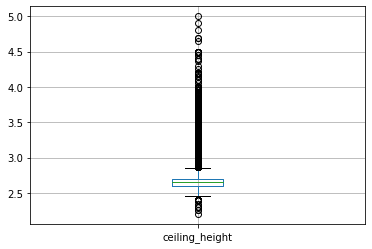

In [72]:

data.boxplot('ceiling_height')


In [73]:
data['ceiling_height'].reset_index(drop=True)

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23579    3.70
23580    2.65
23581    2.65
23582    3.00
23583    2.50
Name: ceiling_height, Length: 23584, dtype: float64

<AxesSubplot:>

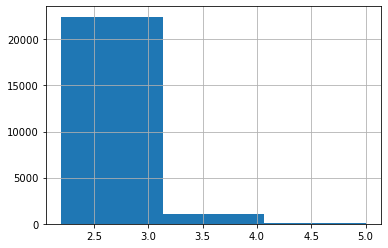

In [74]:
data['ceiling_height'].hist(bins=3)

<AxesSubplot:>

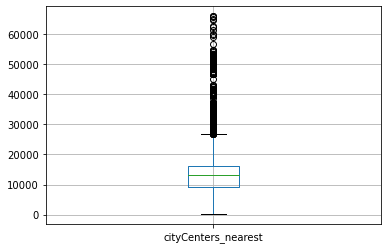

In [75]:
data.boxplot('cityCenters_nearest')

In [76]:
data['cityCenters_nearest'].describe()

count    18085.000000
mean     14188.073652
std       8615.094086
min        181.000000
25%       9234.000000
50%      13094.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [77]:
proportion('cityCenters_nearest')

Доля:  0.09516173624550732


Выбросы составляют в районе 1% от всех данных, это немного, поэтому оставим их.

<AxesSubplot:>

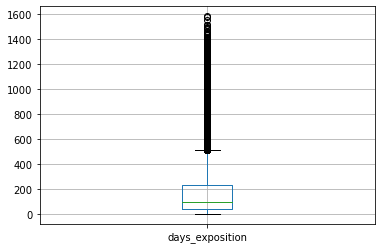

In [78]:
data.boxplot('days_exposition')

In [79]:
print(data['days_exposition'].describe())
proportion('days_exposition')

count    20418.000000
mean       180.876433
std        219.706486
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Доля:  0.08134978940150847


Получается, что выбросы составляют менее 1% процентов от всех данных

<AxesSubplot:>

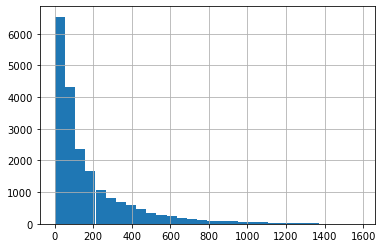

In [80]:
data['days_exposition'].hist(bins=30)

Так как этот парамет выдает автоматически, а не заполняется пользователем вручную, то ошибки не предполагаются, но чтобы избавиться от этого хвоста - удалим их.

In [81]:
q3 = data['days_exposition'].quantile(0.75)
q1 = data['days_exposition'].quantile(0.25)
IQR = q3 - q1
data = data.loc[data['days_exposition'] <= q3+1.5*IQR].reset_index(drop=True)

<AxesSubplot:>

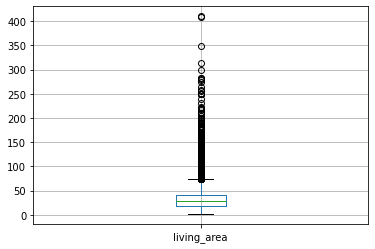

In [82]:
data.boxplot('living_area')

In [83]:
proportion('living_area')

Доля:  0.03113504291731087


Доля выбросов очень мала - оставим их. 

<AxesSubplot:>

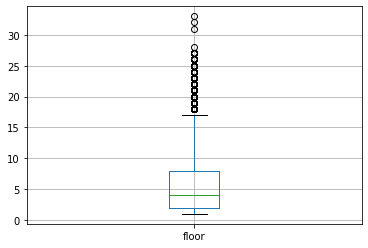

In [84]:
data.boxplot('floor')

In [85]:
print(data['floor'].describe())
proportion('floor')

count    18757.000000
mean         6.003359
std          4.949052
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
Доля:  0.05091432531854774


In [86]:
print(data['floors_total'].describe())
proportion('floors_total')

count    18757.000000
mean        10.922216
std          6.670231
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Доля:  0.0011728954523644506


In [87]:
print(data['kitchen_area'].describe())
proportion('kitchen_area')

count    18757.000000
mean        10.211408
std          5.682585
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64
Доля:  0.0542730713866823


<AxesSubplot:>

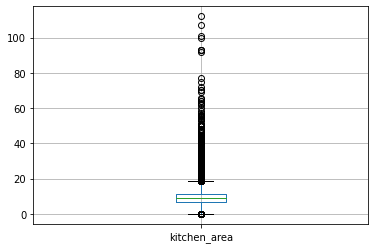

In [88]:
data.boxplot('kitchen_area')

Как видно есть небольшая доля выбросов по парметру kitchen_area. Попробуем проверить, нет ли ошибки в данных, выводя только значений квартир, у которых размер кухни - выброс, и также использую столбец 'total_area' для проверки не превышает ли размер кухни весь размер квартиры.

In [89]:
data.loc[(data['total_area'] <= data['kitchen_area']) & (data['kitchen_area'] >= q3 + 1.5*IQR)][['total_area', 'kitchen_area']]

,total_area,kitchen_area


Как видно, таких значений нет, но все равно чтобы не портить распредление, удалим значения выше 2 * размах.

In [90]:
q3 = data['kitchen_area'].quantile(0.75)
q1 = data['kitchen_area'].quantile(0.25)
IQR = q3 - q1
data = data.loc[data['kitchen_area'] <= q3+2*IQR].reset_index(drop=True)

In [91]:
print(data['last_price'].describe())
proportion('last_price')

count    1.805900e+04
mean     5.366244e+06
std      4.726769e+06
min      4.300000e+05
25%      3.330000e+06
50%      4.400000e+06
75%      6.100000e+06
max      1.599840e+08
Name: last_price, dtype: float64
Доля:  0.06556287723572733


<AxesSubplot:>

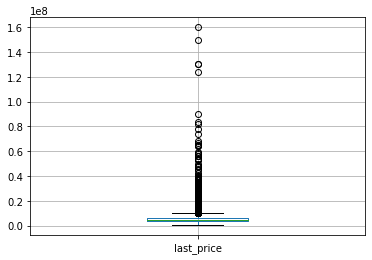

In [92]:
data.boxplot('last_price', widths=0.3)

Как видно из описания минимальное значение сильно отличается от 25% квантиля. Посмотрим на значения, которые меньше 25 квантиля.

In [93]:
q3 = data['last_price'].quantile(0.75)
q1 = data['last_price'].quantile(0.25)
IQR = q3 - q1
data.loc[data['last_price'] <= q1]['last_price'].sort_values()

11322     430000.0
12376     440000.0
13440     450000.0
4318      450000.0
12333     450000.0
           ...    
11226    3330000.0
13569    3330000.0
5047     3330000.0
1737     3330000.0
1293     3330000.0
Name: last_price, Length: 4521, dtype: float64

Получилось, что есть квартиры, которые продают меньше чем за 1 миллион. Выглядит сомнительно, посмотрим сколько таких квартир.

In [94]:
data.loc[data['last_price'] <= 1000000]['last_price'].count()

181

Могу предположить, что так как это данные, которые вводились пользователем, то, возможно, произошла ошибка и бы забыт один ноль. Умножим все значения меньше миллиона на 10.

In [95]:
data.loc[data['last_price'] <= 1000000, 'last_price'] *= 10

In [96]:
print(data['last_price'].describe())

count    1.805900e+04
mean     5.436462e+06
std      4.712908e+06
min      1.010000e+06
25%      3.400000e+06
50%      4.450000e+06
75%      6.200000e+06
max      1.599840e+08
Name: last_price, dtype: float64


Теперь посмотрим на выбросы выше 75 квантиля.

In [97]:
data.loc[data['last_price'] >= q3+1.5*IQR]['last_price'].sort_values(ascending=False)

1900     159984000.0
5980     150000000.0
16723    130000000.0
10517    130000000.0
3772     124000000.0
            ...     
16808     10300000.0
13542     10300000.0
11289     10300000.0
5906      10300000.0
11270     10296911.0
Name: last_price, Length: 1184, dtype: float64

In [98]:
data.loc[data['last_price'] == data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1900,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.0,7,False,...,20.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501.0


Если посмотреть подробней на квартиру с максимальной стоимостью, можно увидеть, что в принципе данная цена похожа на правду.
Но такие значение слишком редки и они могут портить наше распредление - удалим значения выше 3 * размах, потому что хочется, чтобы в данных все же оставались квартиры с немного завешенной ценной, но которые бы встречались чаще других.

In [99]:
q3 = data['last_price'].quantile(0.75)
q1 = data['last_price'].quantile(0.25)
IQR = q3 - q1
data = data.loc[data['last_price'] <= q3+3*IQR].reset_index(drop=True)

In [100]:
print(data['total_area'].describe())
proportion('total_area')

count    17617.000000
mean        52.989247
std         19.585741
min         12.000000
25%         38.500000
50%         48.000000
75%         63.000000
max        238.260000
Name: total_area, dtype: float64
Доля:  0.02548674575693932


Аналогично living_area

In [101]:
print(data['rooms'].describe())
proportion('rooms')

count    17617.000000
mean         1.910144
std          0.912584
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
Доля:  0.0009649770108418005


Доля выбросов очень мала - оставим их.

In [102]:
print(data['total_images'].describe())
proportion('total_images')

count    17617.000000
mean         9.575353
std          5.560798
min          0.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         50.000000
Name: total_images, dtype: float64
Доля:  0.0013623204858943065


Доля выбросов очень мала - оставим их.

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра: поделим значение last_price на total_area

In [103]:
data['price_meter'] = data['last_price'] / data['total_area']
data[['price_meter', 'last_price', 'total_area']]

,price_meter,last_price,total_area
0,82920.792079,3350000.0,40.40
1,95065.789474,2890000.0,30.40
2,99195.710456,3700000.0,37.30
3,87454.764777,2900000.0,33.16
4,88524.590164,5400000.0,61.00
...,...,...,...
17612,100566.572238,3550000.0,35.30
17613,105769.230769,5500000.0,52.00
17614,45000.000000,1350000.0,30.00
17615,73717.948718,4600000.0,62.40


День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [104]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data[['day_of_week', 'first_day_exposition']]

,day_of_week,first_day_exposition
0,1,2018-12-04
1,0,2018-09-10
2,3,2017-11-02
3,2,2018-05-23
4,6,2017-02-26
...,...,...
17612,2,2018-02-28
17613,3,2018-07-19
17614,4,2017-07-07
17615,4,2016-08-05


Месяц публикации объявления

In [105]:
data['publication_month'] = data['first_day_exposition'].dt.month
data[['publication_month', 'first_day_exposition']]

,publication_month,first_day_exposition
0,12,2018-12-04
1,9,2018-09-10
2,11,2017-11-02
3,5,2018-05-23
4,2,2017-02-26
...,...,...
17612,2,2018-02-28
17613,7,2018-07-19
17614,7,2017-07-07
17615,8,2016-08-05


Год публикации объявления

In [106]:
data['publication_year'] = data['first_day_exposition'].dt.year
data[['publication_year', 'first_day_exposition']]

,publication_year,first_day_exposition
0,2018,2018-12-04
1,2018,2018-09-10
2,2017,2017-11-02
3,2018,2018-05-23
4,2017,2017-02-26
...,...,...
17612,2018,2018-02-28
17613,2018,2018-07-19
17614,2017,2017-07-07
17615,2016,2016-08-05


Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [107]:
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data['floor_type'] = data['floor_type'].fillna('другой')
data[['floor_type', 'floors_total', 'floor']]

,floor_type,floors_total,floor
0,первый,11,1
1,другой,12,5
2,другой,26,6
3,другой,27,26
4,другой,9,7
...,...,...,...
17612,другой,15,4
17613,другой,5,2
17614,другой,5,4
17615,другой,9,8


Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [108]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)
data['cityCenters_nearest_km']

0        19.0
1         NaN
2        19.0
3         NaN
4        15.0
         ... 
17612    16.0
17613     6.0
17614     NaN
17615    34.0
17616     NaN
Name: cityCenters_nearest_km, Length: 17617, dtype: float64

### Проведите исследовательский анализ данных

<AxesSubplot:>

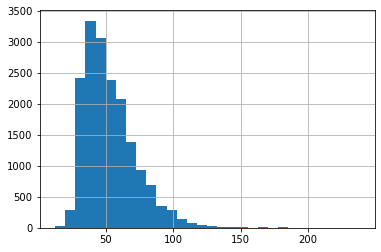

In [109]:
data['total_area'].hist(bins=30)

Распределение очень близко к нормальному, но немного сдвинуто. Есть небольшой хвост редких значений. По гистограмме видно, что чаще всего встречаются квартиры размерностью около 40 кв. метров. 

<AxesSubplot:>

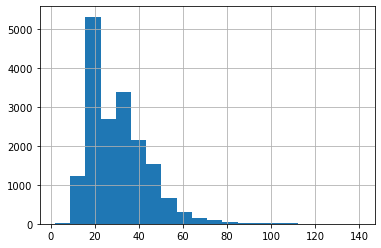

In [110]:
data['living_area'].hist(bins=20)

Видно, что сильный пик находится на значении близкому к 20, далее есть небольшой подъем примерно при 30, но дальше виден спад с увеличением площади квартиры, что очевидно.

<AxesSubplot:>

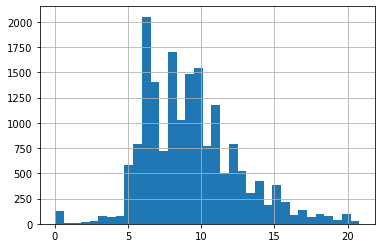

In [111]:
data['kitchen_area'].hist(bins=35)

Предположительно наблюдаются резкие скачки и спады, потому что площадь кухни имеет тип float, а значит дробная часть может варьироваться. Но заметно, что пик значений примерно приходит на 6-7 кв. м.

<AxesSubplot:>

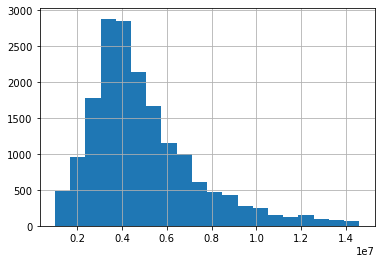

In [112]:
data['last_price'].hist(bins=20)

Данное распределение очень похоже на нормальное, но имеет небольшой хвост редких значений. Чаще всего квартиры продаются по стоимости равной около 4 миллионов.

<AxesSubplot:>

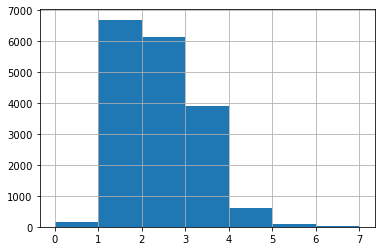

In [113]:
data['rooms'].hist(bins=7)

Чаще всего квартиры имеют 1-2 комнаты

<AxesSubplot:>

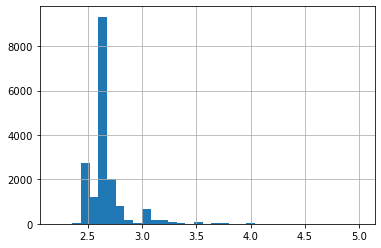

In [114]:
data['ceiling_height'].hist(bins=35)

По гистрограмме можно увидеть, что привалирующее большинсто квартиры имеет высоту потолков около 2.6 метров.

<AxesSubplot:>

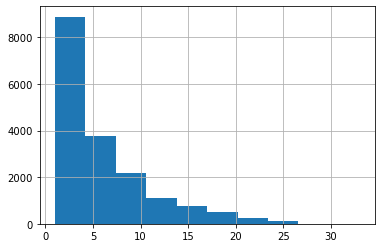

In [115]:
data['floor'].hist(bins=10)

Можно заметить, что чаще всего продают квартиры на первых 5 этажах.

<AxesSubplot:>

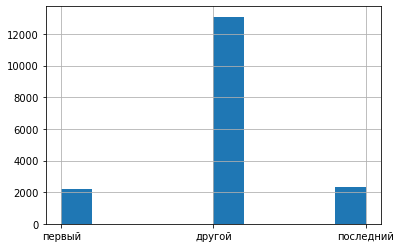

In [116]:
data['floor_type'].hist()

Очевидно, что квартиры на 1 и последнем этаже встречаются реже всего так как их, как минимум, меньше чем на остальных этажах.

<AxesSubplot:>

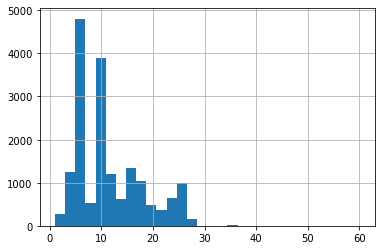

In [117]:
data['floors_total'].hist(bins=30)

Чаще всего дома бывают в 5 или 9 этажей

<AxesSubplot:>

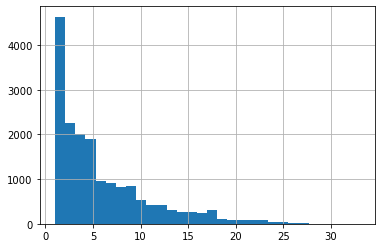

In [118]:
data['floor'].hist(bins=30)

Больше всего предложений составляют квартиры на 2-3 этажах.

<AxesSubplot:>

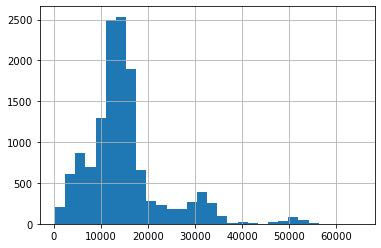

In [119]:
data['cityCenters_nearest'].hist(bins=30)

Большинство квартир расположены в районе 15 км от центра. 

<AxesSubplot:>

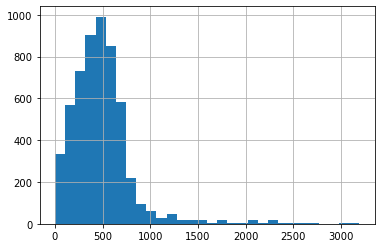

In [120]:
data['parks_nearest'].hist(bins=30)

Парки обычно располагаются в районе 500 метров.

<AxesSubplot:>

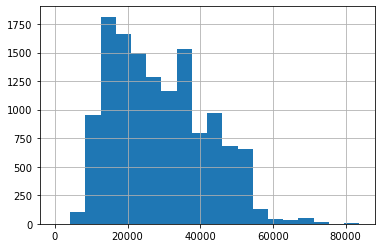

In [121]:
data['airports_nearest'].hist(bins=20)

Расстояние до аэропорта составляет приблизительно 20 км. 

<AxesSubplot:>

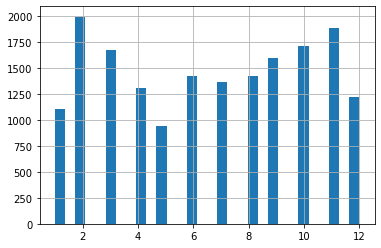

In [122]:
data['publication_month'].hist(bins=30)

Чаще всего квартиры публикуют в начале и конце года.

<AxesSubplot:>

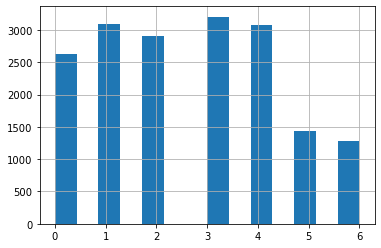

In [123]:
data['day_of_week'].hist(bins=14)

Чаще всего объявления публикуют во время рабочей недели, под конец немного чаще, возможно, это связано с тем, что если предложения публикует компания, то выходные дни не рабочие. 

Изучим столбец days_exposition.

<AxesSubplot:>

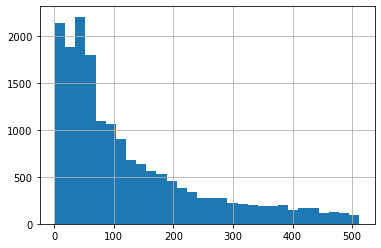

In [124]:
data['days_exposition'].hist(bins=30)

Данное распредление похоже на распредление Пуассона, которое описывает число событий в единицу времени. Данный график говорит о том, что в среднем примерно 100 дней висит объявление.

In [125]:
data['days_exposition'].mean()

126.18175625815974

In [126]:
data['days_exposition'].median()

82.0

Самые долгие объявления висят 400-500 дней, ну а самые быстрые около 50.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

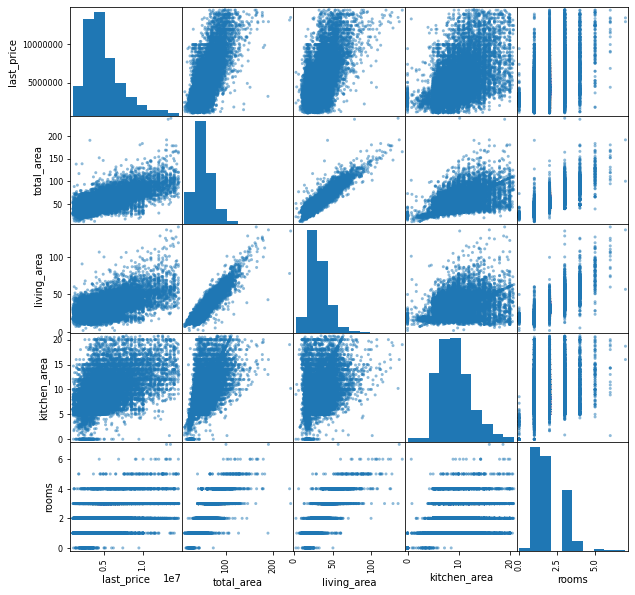

In [127]:
buf = data[['last_price', 'total_area','living_area','kitchen_area', 'rooms', 'floor_type', 'first_day_exposition']]
pd.plotting.scatter_matrix(buf, figsize=(10, 10)) 

Как видно из матрицы диаграмм рассеяния стоимость квартиры в зависимости от размера общей площади квартиры имеет зависимость, хотя и ширина разброса данных значительная.

Так как жилая площадь и общая площадь связаны линейно, то логично предположить, что и стоимость квартиры также зависит от жилой площади, но в немного меньшей степени, чем от общей площади. Даже узучив два графика, видно, что стоимость квартиры в зависимости от жилой площади поднимается немного медленее, чем в зависимости от общей площади.

Иная ситуация с зависимостью от размера кухни, здесь данные очень сильно разбросаны и скорее существует несильная корреляция с ценой квартиры.

Про цены на квартры в зависимости от количества комнат можно сказать, что обычно квартиры с 0 комнат (возможно, студия) или 1 комнатой имеют примерно среднюю или ниже средней стоимость, далее цена может быть совершенно разной при 2-4 комнатах, а начиная с 5 комнат чаще встречаются квартиры больше средней стоимости.

In [128]:
print(buf.corr()) 

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.720209     0.626510      0.510341  0.480778
total_area      0.720209    1.000000     0.927423      0.518209  0.806819
living_area     0.626510    0.927423     1.000000      0.273467  0.878512
kitchen_area    0.510341    0.518209     0.273467      1.000000  0.176661
rooms           0.480778    0.806819     0.878512      0.176661  1.000000


Выводы сверху подтверждает матрица корреляции, видно что сильнее всего цена зависит от общей площади и чуть менее от жилой площадии. От размера кухни зависимость невелика.

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

Найдем 10 населенных пунктов с наибольшим количестовм объявлений

In [129]:
data.pivot_table(index='locality_name', values=['total_area', 'price_meter'], aggfunc={'total_area':'count', 'price_meter':'mean'}).sort_values('total_area', ascending=False).rename(columns={'total_area':'ads_count'}).head(10)

,price_meter,ads_count
locality_name,,
Санкт-Петербург,105283.670022,11389
Мурино,85923.871953,511
Кудрово,94780.779621,393
Шушары,77708.887440,384
Всеволожск,67893.000930,301
Колпино,74729.797592,290
Парголово,89368.209268,286
Пушкин,99203.331353,255
Гатчина,68352.573060,241


Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Для этого почитаем среднее значение стоимости за квадратный метр по каждому населенному пункту.

In [130]:
buf = data.pivot_table(index='locality_name', values=['price_meter'], aggfunc={'price_meter':'mean'}).sort_values('price_meter', ascending=False)
print('Максимальная стоимость \n',buf.iloc[0])
print('Минимальная стоимость \n',buf.iloc[-1])

Максимальная стоимость 
 price_meter    284900.0
Name: Ромашки, dtype: float64
Минимальная стоимость 
 price_meter    20909.090909
Name: Кисельня, dtype: float64


Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 

In [132]:
data.loc[data['locality_name'] =='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values=['last_price'], aggfunc={'last_price':'mean'})

,last_price
cityCenters_nearest_km,
0.0,8.598000e+06
1.0,8.688728e+06
2.0,8.520390e+06
3.0,7.503186e+06
4.0,7.964800e+06
5.0,8.055629e+06
6.0,7.405258e+06
7.0,6.755970e+06
8.0,6.772287e+06


Стоимость объектов уменьшается от расстояния до центра города, но бывают небольшие подъемы в цене. Вероятно, цена может чутка превышать цену района, который находиться на 1-2 км ближе к центру, из-за других факторов: благоустройства района или другой инфраструктуры.

### Общий вывод

Составим картину среднего предложения:
Обычно общая площадь квартиры составяет 40 кв.м. с жилой площадью около 20-30 кв.м. Размер среднестатистической кухни равен 6-7 кв.м. Высота потолков в среднем достигает 2.6 метров.
Стоимость квартиры сильнее всего зависит от ее площади, примерная стоимость = 4 мл. Большинство предложений на рынке имеет 1-2 комнаты и находятся на первых 5 этажах, чем квартира находится выше, тем реже есть объявления о продаже. В большинстве случаях квартире в Питере и Питерской области не высокоэтажные, до 10 этажей.
Среднее расстояние квартир до центра - 15 км, до парка - 500 метров, до аэропорта - 20 км. 
Предложения чаще всего публикают в конце и начале года, в рабочие дни. Продажа снимается в среднем за 100 дней.
Самый дорогой населенный пункт можно считать нас. пункт "Ромашка", а самый бюджетный - "Кисельня".

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод